In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Lee el archivo CSV
df = pd.read_csv('Features_analisisFactorial.csv')

# Filtra los datos según el valor de la columna "Type"
variables_df = df[df['Type'] == 'Variable']
no_variables_df = df[df['Type'] == 'No_Variable']

# Convierte cada columna en un np.array
resultados_slope_min_v= np.array(variables_df['resultados_slope_min'])
proy_variables = np.array(variables_df['proy'])
integrals_variables = np.array(variables_df['integrals'])
resultados_r_value_min_v = np.array(variables_df['resultados_r_value_min'])
rob_s_variables = np.array(variables_df['rob_s'])
resultados_variables = np.array(variables_df['resultados'])
rEucliDs_variables = np.array(variables_df['rEucliDs'])

resultados_slope_min_nv = np.array(no_variables_df['resultados_slope_min'])
proy_novaribles = np.array(no_variables_df['proy'])
integrals_novariables= np.array(no_variables_df['integrals'])
resultados_r_value_min_nv= np.array(no_variables_df['resultados_r_value_min'])
rob_s_novariables= np.array(no_variables_df['rob_s'])
resultados_novariables = np.array(no_variables_df['resultados'])
rEucliDs_novariables = np.array(no_variables_df['rEucliDs'])


In [14]:
# Concatenación de tus características
features_variables = np.column_stack((resultados_slope_min_v, proy_variables, integrals_variables, resultados_r_value_min_v, rob_s_variables, resultados_variables, rEucliDs_variables))
features_novariables = np.column_stack((resultados_slope_min_nv, proy_novaribles,  integrals_novariables, resultados_r_value_min_nv, rob_s_novariables, resultados_novariables, rEucliDs_novariables))
all_features = np.vstack((features_variables, features_novariables))

# Nombres de las características
feature_names = ['resultados_slope_min','proy', 'integrals', 'resultados_r_value_min', 'rob_s', ' resultados', 'rEucliDs' ]

# Estandarización de las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_features)

C:\Users\c.cardenasu\AppData\Local\Temp\ipykernel_2688\1859006896.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(componentes[:, 0], componentes[:, 1], cmap='viridis')


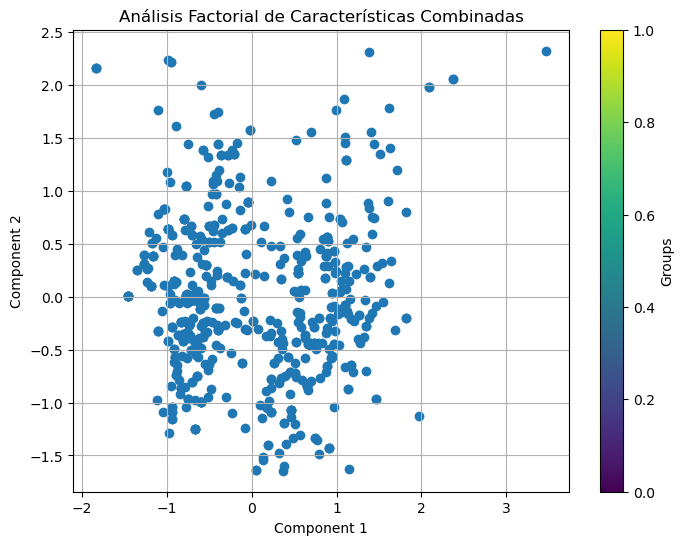

Cargas Factoriales:
   resultados_slope_min      proy  integrals  resultados_r_value_min  \
0              0.461897 -0.064126   0.367234                0.656840   
1             -0.280266  0.130141   0.137646               -0.100564   

      rob_s   resultados  rEucliDs  
0  0.272530     0.216773   0.74138  
1  0.584947     0.616298  -0.14849  


<Figure size 640x480 with 0 Axes>

In [15]:
# Aplicar el análisis factorial
analisis_factorial = FactorAnalysis(n_components=2)
componentes = analisis_factorial.fit_transform(scaled_features)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(componentes[:, 0], componentes[:, 1], cmap='viridis')
plt.title('Análisis Factorial de Características Combinadas')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Groups')
plt.grid(True)
plt.show()
plt.savefig('C_Clustering_Factorial.png')
# Imprimir las cargas factoriales
cargas_factoriales = analisis_factorial.components_
print("Cargas Factoriales:")
print(pd.DataFrame(cargas_factoriales, columns=feature_names))